<a href="https://colab.research.google.com/github/yx-dliu/2-HAD7001-S25/blob/main/had7001h_datathon1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2_HAD7001_W25 Code

**Chosen dataset:** Dataset 2 (Public Health Factors Influencing BMI)

**Goal:** To train a supervised learning model using the *k*-nearest neighbour (KNN) algorithm to perform binary classification of patients as “obese” (BMI ≥ 30.0) or “non-obese” (BMI < 30.0).





# Setting up

## Reading in data

In [1]:
# Uploading code

from google.colab import files
import pandas as pd
import numpy as np
import io
uploaded = files.upload()

Saving Datathon1.csv to Datathon1.csv


## Exploring the data

In [2]:
df = pd.read_csv(io.BytesIO(uploaded['Datathon1.csv']))

print(df.shape)
df.head()

(23535, 10)


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [3]:
print(df.columns)
df.dtypes

Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


,0
Age,int64
Gender,object
Calorie_Intake,int64
Sugar_Intake,int64
Physical_Activity,int64
Fast_Food_Frequency,int64
Screen_Time,int64
Height,float64
Weight,float64
BMI,float64


# Data cleaning and preprocessing

1. Dropped `Height` and `Weight` since we don't plan to use them in our analyses to avoid collinearity;
2. Tested for associations between variables with correlation matrix;
3. Created a new variable `Obesity` (1 = BMI ≥ 30.0, 0 = BMI < 30) to serve as target labels for supervised learning;
4. Encoded all categorical variables (`Gender`: 0 = male, 1 = female);
5. Checked for missing values (none).

In [4]:
df1 = df.copy().drop(columns=["Height", "Weight"])

df1['Obesity'] = np.where(df1['BMI'] >= 30, 1, 0) # 1 = Obese, 0 = Non-obese
df1["Gender"] = np.where(df1["Gender"] == "Male", 0, 1) # 0 = Male, 1 = Female

df1

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,BMI,Obesity
0,56,1,3091,90,160,4,1,32.981343,1
1,69,1,2090,106,27,0,9,27.973877,0
2,46,0,2938,11,45,2,3,26.640417,0
3,32,1,3022,48,112,1,8,42.813720,1
4,60,1,2350,83,115,0,7,28.810685,0
...,...,...,...,...,...,...,...,...,...
23530,51,1,2858,65,37,1,9,18.075460,0
23531,20,1,2573,27,27,1,1,20.362283,0
23532,26,1,2246,37,44,0,3,29.109537,0
23533,22,0,1588,24,101,4,7,17.433880,0


In [ ]:
# Check for missing values in each column
print(df1.isna().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
BMI                    0
Obesity                0
dtype: int64


In [6]:
print("Summary statistics by variable:")
print(df1.describe())

Summary statistics by variable:
                Age        Gender  Calorie_Intake  Sugar_Intake  \
count  23535.000000  23535.000000    23535.000000  23535.000000   
mean      48.532993      0.632930     2495.845634     64.824559   
std       17.872736      0.482016      577.798752     32.004657   
min       18.000000      0.000000     1500.000000     10.000000   
25%       33.000000      0.000000     1991.000000     37.000000   
50%       48.000000      1.000000     2495.000000     65.000000   
75%       64.000000      1.000000     2994.000000     93.000000   
max       79.000000      1.000000     3499.000000    119.000000   

       Physical_Activity  Fast_Food_Frequency   Screen_Time           BMI  \
count       23535.000000         23535.000000  23535.000000  23535.000000   
mean           89.496707             2.018441      5.486127     26.127641   
std            52.120810             1.414634      3.454036      6.875510   
min             0.000000             0.000000      0.000

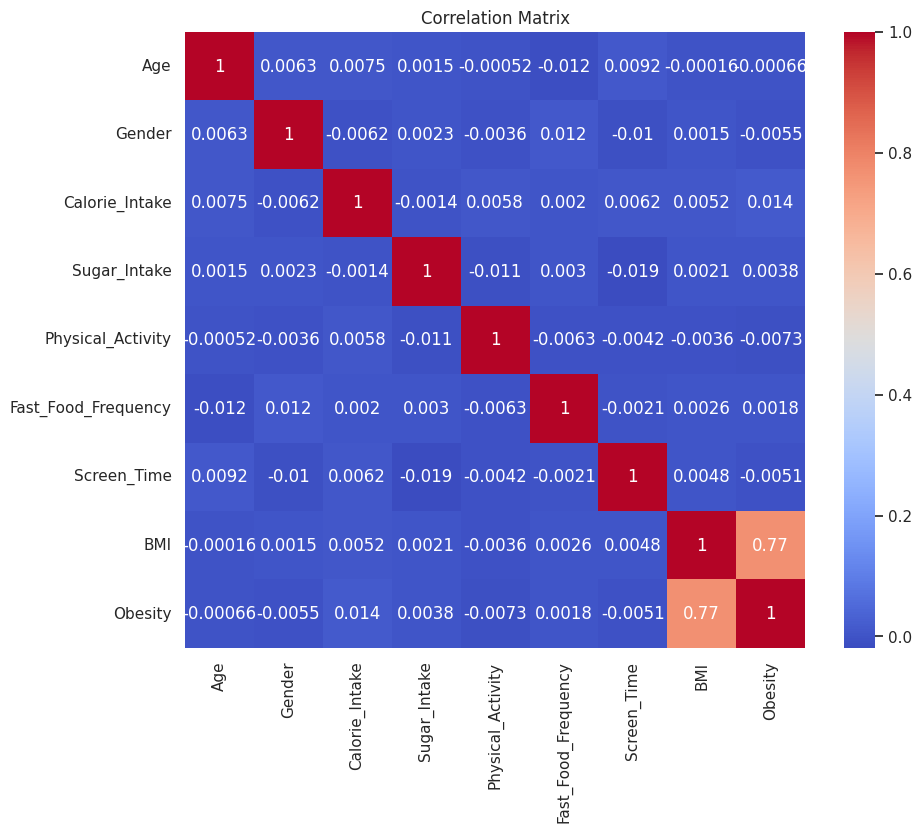

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Identifying outliers
1. Plotted all continuous data;
2. Removed outliers (`BMI` not in bounds (7.85, 43.82)).

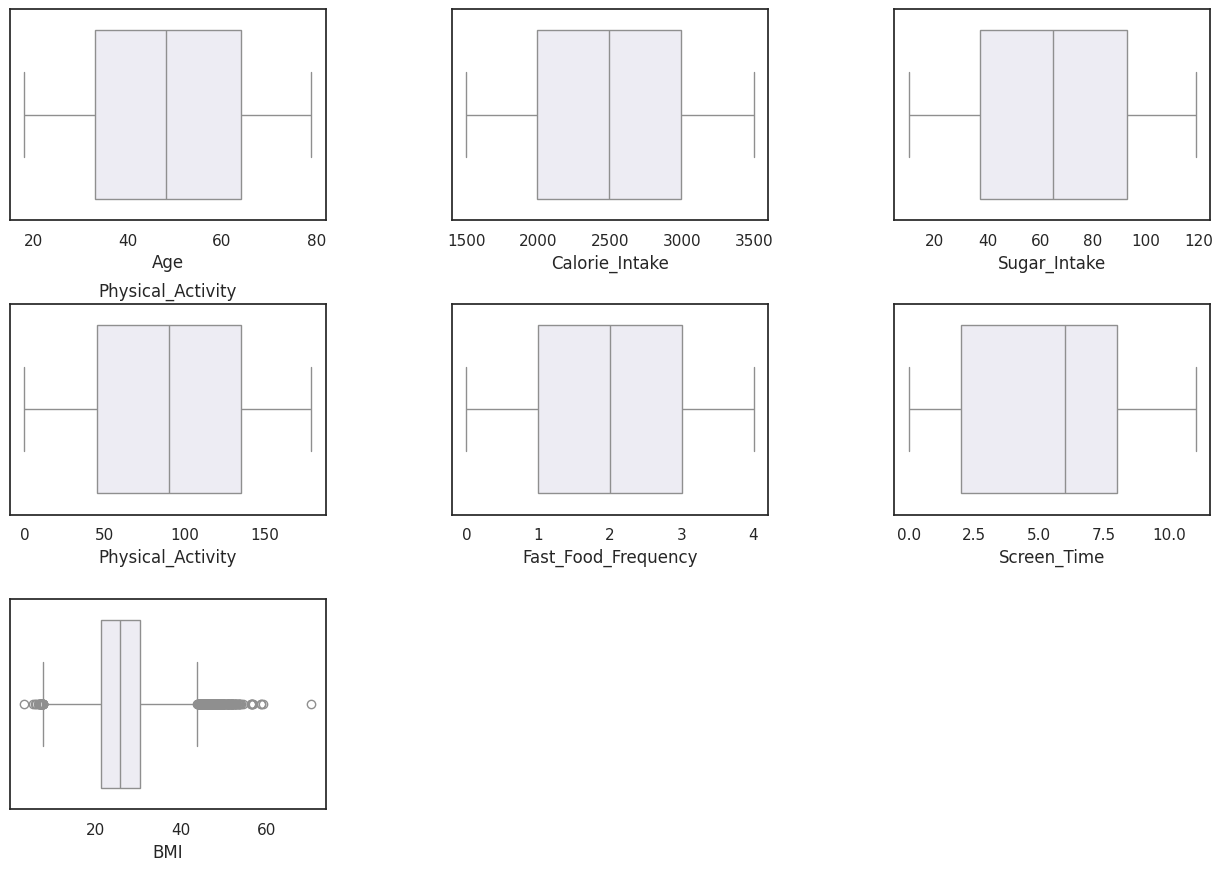

In [7]:
# Checking for outliers with boxplots

sns.set(style="white")
sns.set_palette("Purples")

# FacetGrid of all boxplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9,
                    wspace=0.4, hspace=0.4)

sns.boxplot(x=df1["Age"], ax=axes[0,0])
#axes[0,0].set_title("Age")

sns.boxplot(x=df1["Calorie_Intake"], ax=axes[0,1])
#axes[0,1].set_title("Calorie_Intake")

sns.boxplot(x=df1["Sugar_Intake"], ax=axes[0,2])
##axes[0,2].set_title("Sugar_Intake")

sns.boxplot(x=df1["Physical_Activity"], ax=axes[1,0])
axes[1,0].set_title("Physical_Activity")

sns.boxplot(x=df1["Fast_Food_Frequency"], ax=axes[1,1])
#axes[1,1].set_title("Fast_Food_Frequency")

sns.boxplot(x=df1["Screen_Time"], ax=axes[1,2])
#axes[1,2].set_title("Screen_Time")

sns.boxplot(x=df1["BMI"], ax=axes[2,0])
#axes[2,0].set_title("BMI")

axes[2,1].set_axis_off()
axes[2,2].set_axis_off()

plt.show()

In [9]:
# Identify outliers in BMI (313 outliers)

q1 = np.quantile(df1["BMI"], 0.25)
q3 = np.quantile(df1["BMI"], 0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in range(0, len(df1)):
  if df1["BMI"][i] < lower_bound or df1["BMI"][i] > upper_bound:
    outliers.append(i)

len(outliers)

313

In [10]:
# dataframe of outlier rows only
df.iloc[outliers]

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
54,20,Female,1790,89,9,1,5,1.437723,95.602550,46.250767
89,79,Female,1578,95,85,1,5,1.503389,107.346940,47.494910
155,26,Female,2404,89,57,1,7,1.340943,93.331192,51.904677
219,79,Female,2713,73,91,0,2,1.530094,106.384388,45.440369
245,58,Female,3279,51,138,2,0,1.401758,91.675144,46.655759
...,...,...,...,...,...,...,...,...,...,...
23095,76,Female,3117,107,63,2,7,1.389554,88.303892,45.732917
23133,22,Male,2504,52,140,1,1,1.285445,89.101201,53.923340
23279,18,Female,3059,60,44,1,10,1.484137,100.096493,45.443388
23294,19,Female,1833,33,112,4,4,1.391465,88.023188,45.462415


In [11]:
no_outliers = df1.drop(df1.index[outliers])
no_outliers

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,BMI,Obesity
0,56,1,3091,90,160,4,1,32.981343,1
1,69,1,2090,106,27,0,9,27.973877,0
2,46,0,2938,11,45,2,3,26.640417,0
3,32,1,3022,48,112,1,8,42.813720,1
4,60,1,2350,83,115,0,7,28.810685,0
...,...,...,...,...,...,...,...,...,...
23530,51,1,2858,65,37,1,9,18.075460,0
23531,20,1,2573,27,27,1,1,20.362283,0
23532,26,1,2246,37,44,0,3,29.109537,0
23533,22,0,1588,24,101,4,7,17.433880,0


## Checking for class imbalance
As there is 3 times as many non-obese rows as obese rows (i.e., the minority class comprises ~26% of dataset)—we expect results to be affected by class imbalance. However, removing outliers does not appear to have worsened imbalance.

In [12]:
count_all_obese = (df1['Obesity'] == 1).sum()
count_all_not_obese = (df1['Obesity'] == 0).sum()
print("Number of obese vs. non-obese, outliers not removed")
print(f"Number of obese: {count_all_obese}")
print(f"Number of not obese: {count_all_not_obese}")
print(f"Percent of minority class:{count_all_obese/len(df1)*100:.2f}%")

Number of obese vs. non-obese, outliers not removed
Number of obese: 6256
Number of not obese: 17279
Percent of minority class:26.58%


In [13]:
count_obese = (no_outliers['Obesity'] == 1).sum()
count_not_obese = (no_outliers['Obesity'] == 0).sum()
print("Number of obese vs. non-obese, outliers removed")
print(f"Number of obese: {count_obese}")
print(f"Number of not obese: {count_not_obese}")
print(f"Percent of minority class:{count_obese/len(no_outliers)*100:.2f}%")

Number of obese vs. non-obese, outliers removed
Number of obese: 5968
Number of not obese: 17254
Percent of minority class:25.70%


# Full dataset

## Setting up KNN and training sets
Do you figure we should also include our results for tests w/no outliers removed?

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#Splitting data into features and labels

X_all = no_outliers[['Age', 'Gender', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
X_diet = no_outliers[["Age", "Gender", "Sugar_Intake","Fast_Food_Frequency"]]
X_life = no_outliers[["Age", "Gender", "Physical_Activity", "Screen_Time"]]
X_best = no_outliers[["Age", "Gender", "Physical_Activity"]]

y = no_outliers['Obesity']

# Tests
"Best" result = maximize recall (true positive rate) for the minority class (obese)—i.e., maximize true positive rate for identifying obese patients as the potential harm of missing obese individuals outweighs the inconvenience or cost of false positives.

## Test function


In [16]:
def knn_test(X, y, k, stratify = False, metric=None):

  if stratify == True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  if metric is None:
    knn = KNeighborsClassifier(n_neighbors=k,weights="distance")
  else:
    knn = KNeighborsClassifier(n_neighbors=k,weights="distance",metric=metric)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  classes = no_outliers['Obesity'].unique()

  plt.figure(figsize=(7,5))
  sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

## All features (age and gender, diet and lifestyle)

### Test: All features, k=5, distance=minkowski


[[3000  451]
 [1035  159]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      3451
           1       0.26      0.13      0.18      1194

    accuracy                           0.68      4645
   macro avg       0.50      0.50      0.49      4645
weighted avg       0.62      0.68      0.64      4645



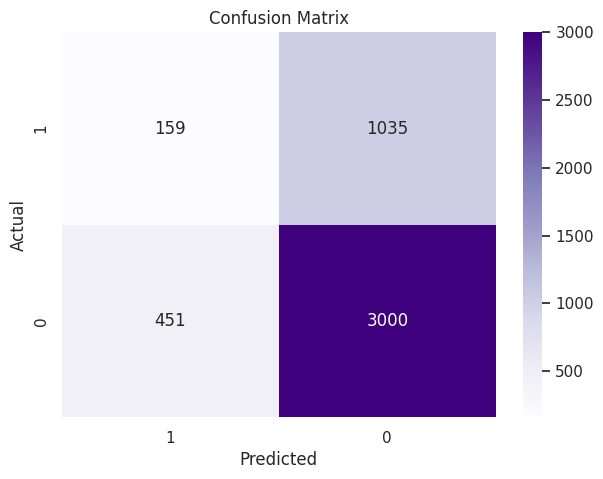

In [21]:
knn_test(X_all, y, 5,stratify=True)

### Test: All features, k=5, distance=euclidean


[[3000  451]
 [1035  159]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      3451
           1       0.26      0.13      0.18      1194

    accuracy                           0.68      4645
   macro avg       0.50      0.50      0.49      4645
weighted avg       0.62      0.68      0.64      4645



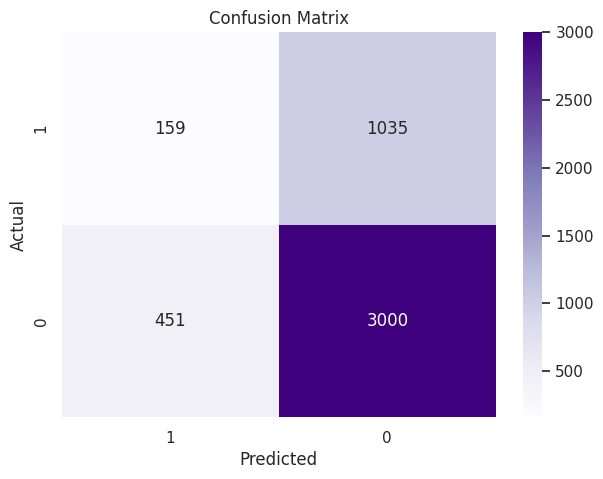

In [22]:
knn_test(X_all, y, 5,metric="euclidean",stratify=True)

## Diet only (age and gender, sugar intake, fast food frequency)

### Test: Diet only, k=5, distance=euclidean


[[2836  615]
 [1017  177]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      3451
           1       0.22      0.15      0.18      1194

    accuracy                           0.65      4645
   macro avg       0.48      0.49      0.48      4645
weighted avg       0.60      0.65      0.62      4645



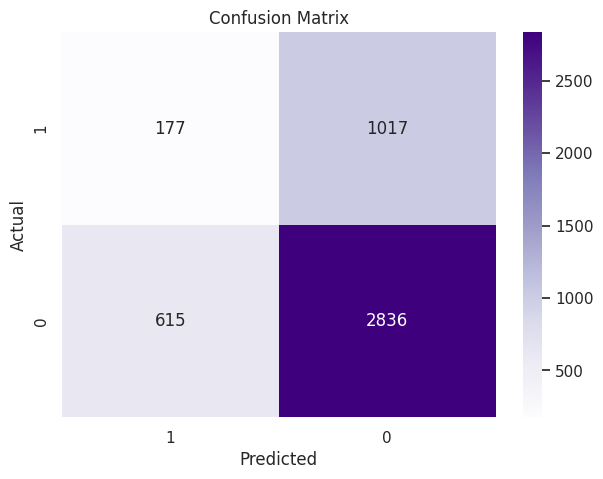

In [24]:
knn_test(X_diet, y, 5,metric="euclidean",stratify=True)

### Test: Diet only, k=5, distance=minkowski

[[2836  615]
 [1017  177]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      3451
           1       0.22      0.15      0.18      1194

    accuracy                           0.65      4645
   macro avg       0.48      0.49      0.48      4645
weighted avg       0.60      0.65      0.62      4645



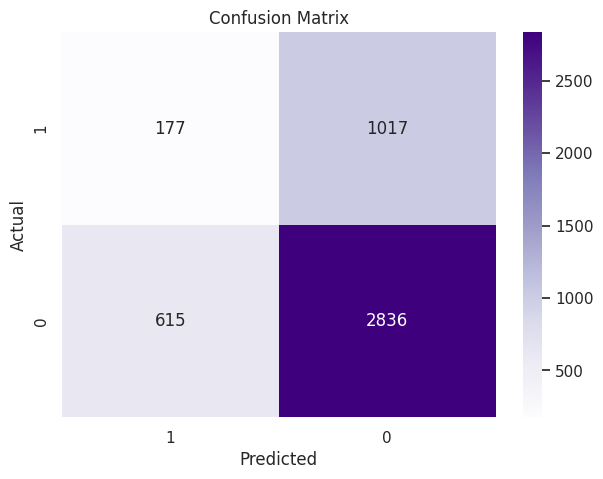

In [25]:
knn_test(X_diet, y, 5,stratify=True)

## Lifestyle only (age and gender, physical activity, screen time)

### Test: Lifestyle only, k=5, distance=minkowski

[[2899  552]
 [ 999  195]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      3451
           1       0.26      0.16      0.20      1194

    accuracy                           0.67      4645
   macro avg       0.50      0.50      0.49      4645
weighted avg       0.62      0.67      0.64      4645



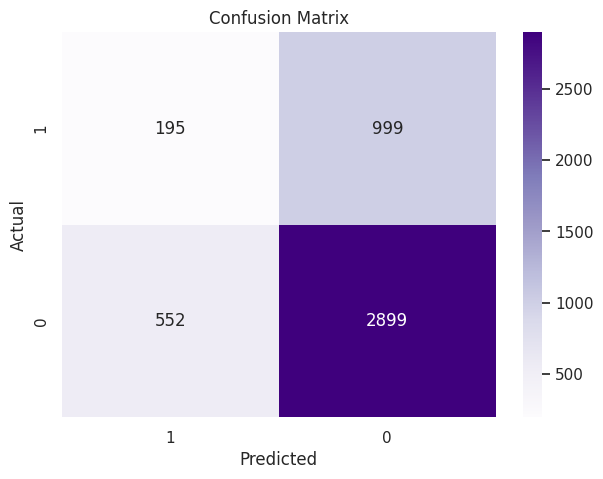

In [26]:
knn_test(X_life, y, 5,stratify=True)

### Test: Lifestyle only, k=5, distance=euclidean

[[2899  552]
 [ 999  195]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      3451
           1       0.26      0.16      0.20      1194

    accuracy                           0.67      4645
   macro avg       0.50      0.50      0.49      4645
weighted avg       0.62      0.67      0.64      4645



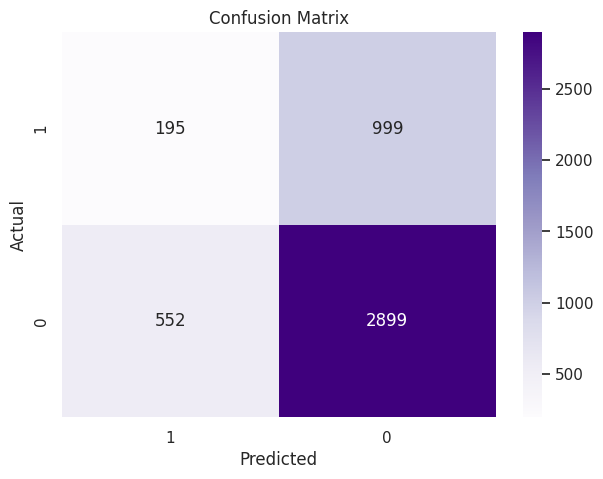

In [28]:
knn_test(X_life, y, 5,stratify=True,metric="euclidean")

### **[BEST RESULT]** Test: Age, Gender, Physical activity, k=5, distance=minkowski

[[2840  611]
 [ 992  202]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      3451
           1       0.25      0.17      0.20      1194

    accuracy                           0.65      4645
   macro avg       0.49      0.50      0.49      4645
weighted avg       0.61      0.65      0.63      4645



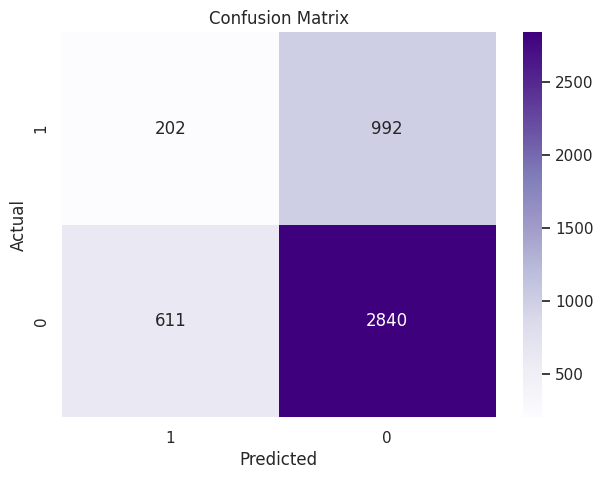

In [29]:
knn_test(X_best, y, 5,stratify=True)